#Importing Libraries

  



In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#Loading DataSet

In [37]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/employee-compensation.csv')

In [38]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


#Performing EDA


In [39]:
df = data.copy()

In [40]:
df.shape

(683277, 22)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [42]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [43]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [44]:
data.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

#Dropping Columns

In [45]:
df = df.dropna()

In [46]:
df.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [47]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [48]:
df['Organization Group'].unique()

array(['Public Protection', 'Public Works, Transportation & Commerce',
       'Human Welfare & Neighborhood Development', 'Community Health',
       'Culture & Recreation', 'General Administration & Finance',
       'General City Responsibilities'], dtype=object)

In [49]:
# df[df['Department Code'].isnull() == True].head()

In [50]:
df.drop(['Job Family','Job','Job Family Code','Job Code','Department Code','Department','Union','Salaries','Overtime','Other Salaries','Total Benefits','Organization Group','Year Type'],axis = 1, inplace = True)
df.head()



,Organization Group Code,Year,Union Code,Employee Identifier,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,2013,21.0,37730,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,2013,21.0,26574,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,2013,21.0,8148,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,2013,21.0,27436,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,2013,21.0,37730,5084.00,1083.90,956.91,387.50,7512.31


In [51]:
df.dtypes

Organization Group Code      int64
Year                         int64
Union Code                 float64
Employee Identifier          int64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Compensation         float64
dtype: object

In [52]:
#DATA ENCODING

In [53]:
# df_en = pd.get_dummies(df,columns= ['Year Type','Organization Group'])

In [54]:
# df_en.head()

#Ploting Required Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


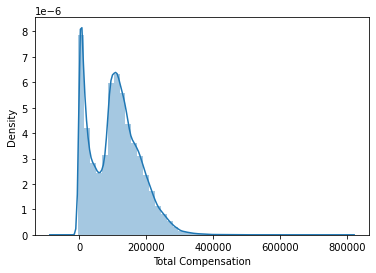

In [55]:
sns.distplot(df['Total Compensation'])
plt.show()

In [56]:
print("Skewness: %f" % df['Total Compensation'].skew())
print("Kurtosis: %f" % df['Total Compensation'].kurt())

Skewness: 0.409119
Kurtosis: 0.020116


In [57]:
df['Retirement & Other benefits'] = df['Retirement'] + df['Other Benefits'] + df['Health and Dental']
df.drop(['Retirement','Other Benefits','Health and Dental'],axis = 1, inplace = True)

In [58]:
df.head(2)

,Organization Group Code,Year,Union Code,Employee Identifier,Total Salary,Total Compensation,Retirement & Other benefits
0,1,2013,21.0,37730,57534.65,85281.78,27747.13
1,1,2013,21.0,26574,57678.50,79895.32,22216.82


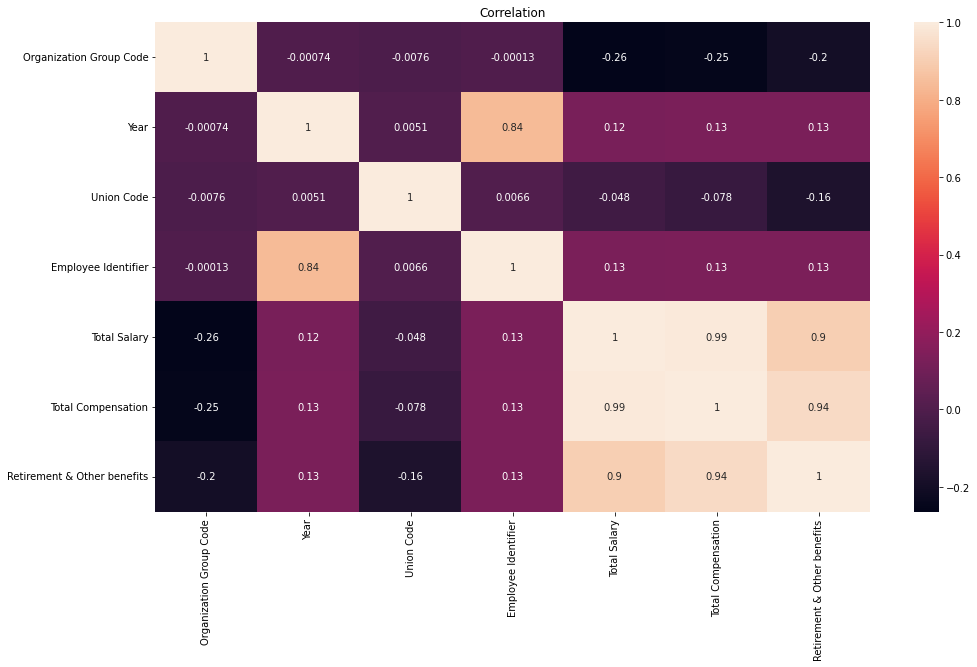

In [59]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot = True)
plt.title("Correlation")
plt.show()

#Applying Elbow Method

In [60]:
train = df[['Total Compensation','Retirement & Other benefits']]

In [61]:
train.columns

Index(['Total Compensation', 'Retirement & Other benefits'], dtype='object')

In [62]:
train.isnull().sum()

Total Compensation             0
Retirement & Other benefits    0
dtype: int64

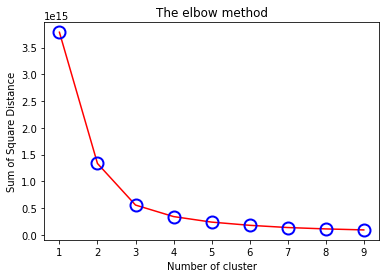

In [63]:
#Initializing Empty array to store the value of sum of square
#We use init to initialize the method here we are gonna use k-means++ method
wss = []

for i in range(1,10):
  km = KMeans(n_clusters= i , init = 'k-means++')
  km.fit(train)
  wss.append(km.inertia_)

plt.plot(range(1,10),wss, 'r*-',marker = 'o',markersize = 12,markeredgewidth = 2,markeredgecolor = 'b',markerfacecolor ='None')

plt.xlabel("Number of cluster")
plt.ylabel("Sum of Square Distance")
plt.title("The elbow method")
plt.show()

#Using visualizer from Yellowbrick library To visualize the number of cluster

In [64]:
from yellowbrick.cluster import KElbowVisualizer

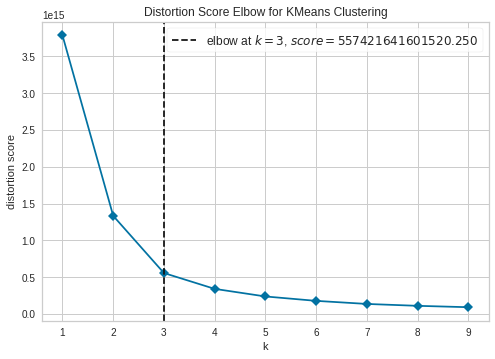

In [65]:
model = KMeans()
visualizer = KElbowVisualizer(model,k =(1,10),timings=False)
visualizer.fit(train)
visualizer.show()

#Using Silouette Score to Identify the cluser

In [66]:
# for i in range(2,10):
#   km = KMeans(n_clusters= i, max_iter=100)
#   km.fit(train)
#   score = silhouette_score(train,km.labels_, metric='euclidean')
#   print("For cluster {}. The silouette score is {}".format(i,score))



In [67]:
# score = []
# for i in range(2,10):
#   km = KMeans(n_clusters = i)
#   km.fit(train)
#   labels = km.labels_
#   centroids = km.cluster_centers_
#   score.append(silhouette_score(train,labels,metric = 'euclidean'))
# plt.plot(range(2,20),score)
# plt.xticks(range(2,10))
# plt.xlabel("Number Of Cluster")
# plt.ylabel("Silhouette Coefficient")
# plt.show()

In [79]:
#train['Cluster'] = km.labels_
print(km.labels_)
# print(train)

[1 1 1 ... 1 2 2]


In [83]:
km = KMeans(n_clusters= 3)
label = km.fit_predict(train)
# unique_label = np.unique(label)

train['Cluster'] = label


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


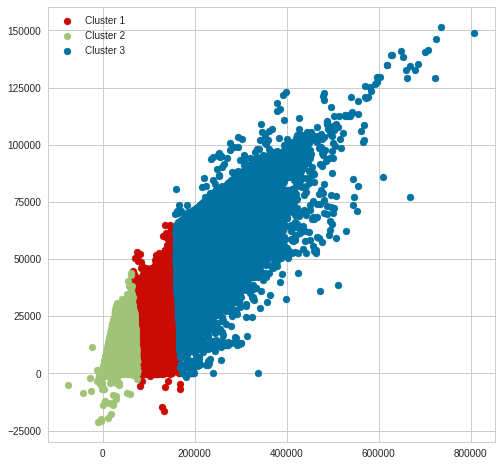

In [93]:
train = np.array(train)
plt.figure(figsize = (8,8))
plt.scatter(train[label== 0,0],train[label==0,1],c= 'r',label= "Cluster 1")
plt.scatter(train[label== 1,0],train[label==1,1],c= 'g',label= "Cluster 2")
plt.scatter(train[label== 2,0],train[label==2,1],c= 'b',label= "Cluster 3")
plt.legend()

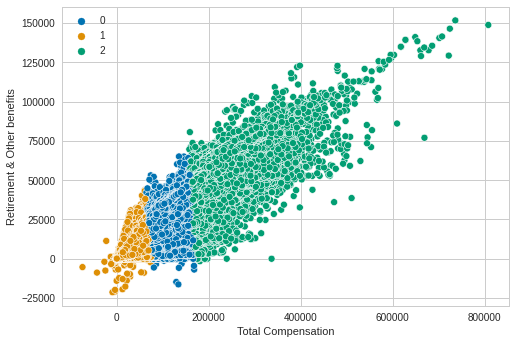

In [81]:
sns.scatterplot(x = 'Total Compensation',y = 'Retirement & Other benefits',hue= 'Cluster',palette='colorblind', data= train)
plt.legend()
plt.show()

#Using Heirarchical Cluster

Importing libraries

In [71]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [72]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [73]:
plt.style.use('seaborn-whitegrid')

In [74]:
# plt.figure(figsize= (16,9))
# z = linkage(df.drop(['Total Compensation'],axis = 1),method='single')
# plt.title('SINGLE',size = 30)
# dendrogram(z,orientation='top',truncate_mode='lastp',p = 12,get_leaves=False,leaf_rotation=45,leaf_font_size=12,show_contracted=True)
# plt.xlabel("Cluster Size",fontsize=30)
# plt.ylabel("Distances",fontsize=30)
# plt.show()